In [14]:
import torchvision.transforms as transforms
from torchvision.transforms import v2
import torchvision
import numpy as np
import matplotlib.pyplot as plt
#import koreanize_matplotlib
import CNNutils as utils
import torch.optim as optim
import torch.nn as nn
from torchmetrics.classification import MulticlassF1Score
import torch.optim.lr_scheduler as lr_scheduler
#from torchinfo import summary
from torch.utils.data import DataLoader
import pandas as pd
from torchvision.transforms import v2

In [15]:
TRAIN_PATH='train/'
VAL_PATH='val/'
TEST_PATH='test/'

In [16]:
img_TR=v2.Compose(
    [v2.Resize(size=(256,256),interpolation=v2.InterpolationMode.BILINEAR),
    transforms.ToTensor()]
)

In [17]:
trainDS=torchvision.datasets.ImageFolder(root=TRAIN_PATH,transform=img_TR)
valDS=torchvision.datasets.ImageFolder(root=VAL_PATH,transform=img_TR)
testDS=torchvision.datasets.ImageFolder(root=TEST_PATH,transform=img_TR)

In [18]:
idx=trainDS.class_to_idx
idx

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

In [19]:
def get_disease(num):
    if num==0:
        disease='코로나'
    elif num==1:
        disease='정상'
    elif num==2:
        disease='폐렴'
    elif num==3:
        disease='결핵'
    return disease
    

In [20]:
# fig,axs=plt.subplots(5,5,figsize=(20,20))
# cnt=0
# for feature,target in testDS:
#     x=cnt//5
#     y=cnt%5
#     axs[x,y].imshow(feature.permute(1,2,0))
#     axs[x,y].set(title=get_disease(target))
#     cnt+=1
#     # print(target)
#     if cnt==25:
#         break


In [21]:
pd.Series(trainDS.targets).value_counts()

2    3060
1    2852
3    2788
0    2276
Name: count, dtype: int64

In [22]:
pd.Series(valDS.targets).value_counts()

1    191
3    106
2    104
0     98
Name: count, dtype: int64

In [23]:
for feature,target in testDS:
    print(feature.shape)
    break

torch.Size([3, 256, 256])


In [24]:
trainDL=DataLoader(trainDS,batch_size=1)
for feature,target in trainDL:
    print(feature.shape)
    print(target)
    break

torch.Size([1, 3, 256, 256])
tensor([0])


In [112]:
# Batch_size=1
# trainDL=DataLoader(trainDS,batch_size=Batch_size,shuffle=True)


In [113]:
# fig,axs=plt.subplots(5,5,figsize=(20,20))
# cnt=0
# for feature,target in trainDL:
#     x=cnt//5
#     y=cnt%5
#     axs[x,y].imshow(feature.squeeze().permute(1,2,0))
#     axs[x,y].set(title=get_disease(target))
#     cnt+=1
#     # print(target)
#     if cnt==25:
#         break


In [114]:
Batch_size=256
trainDL=DataLoader(trainDS,batch_size=Batch_size,shuffle=True)
valDL=DataLoader(valDS,batch_size=len(valDS),shuffle=True)

In [115]:
# model=torchvision.models.efficientnet_b0(pretrained=True)
# def set_parameter_requires_grad(model,feature_extraction=True):
#     if feature_extraction:
#         for param in model.parameters():
#             param.requires_grad=False
# set_parameter_requires_grad(model)
# model.fc=nn.Linear(1000,len(trainDS.classes))

In [117]:
model=utils.CNNmodel(3,len(trainDS.classes),256,Knums=[16,16,32,64,128,256],Pnums=[256,128,64,32,16])
optimizer=optim.Adam(model.parameters(),lr=0.01)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=10,factor=0.1,mode='max')
lossf=nn.CrossEntropyLoss()
scoref=MulticlassF1Score(num_classes=len(trainDS.classes))


In [118]:
# trainDL=DataLoader(trainDS,batch_size=1)
# for feature,target in trainDL:

#     print(feature.shape)
#     print(model(feature).shape)
#     break

In [119]:
#model.requires_grad_

In [120]:
print(model)

CNNmodel(
  (in_layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (h_layer): ModuleList(
    (0): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d

In [121]:
import psutil

# 현재 프로세스 가져오기
process = psutil.Process()

# 메모리 사용량 (바이트 단위)
memory_info = process.memory_info()

# Resident Set Size (rss): 실제 사용 중인 물리적 메모리
memory_usage = memory_info.rss

# 메모리 사용량을 MB 단위로 출력
print(f"현재 메모리 사용량: {memory_usage / 1024 ** 2:.2f} MB")

현재 메모리 사용량: 440.64 MB


In [122]:
EPOCH=1000
TV=utils.Train_val(trainDL,valDL,model,optimizer,lossf,scoref)
train=TV.train(EPOCH,scheduler,2)

[1/1000]
train loss 1.2126593589782715, train score 0.3392559355774591
val loss 1.320867896080017, val score 0.3598582148551941
scheduler.num_bad_epochs 0/10
[2/1000]
train loss 1.0990668091663094, train score 0.3501401217870934
val loss 0.9971394538879395, val score 0.4578604996204376
scheduler.num_bad_epochs 0/10
[3/1000]
train loss 0.8615312243616858, train score 0.5581931887671004
val loss 1.0154725313186646, val score 0.44232177734375
scheduler.num_bad_epochs 1/10
[4/1000]
train loss 0.7105252853659696, train score 0.6443298611530038
val loss 0.8436711430549622, val score 0.5008842349052429
scheduler.num_bad_epochs 0/10
[5/1000]
train loss 0.7124584303345791, train score 0.6837343421093253
val loss 0.8556694984436035, val score 0.5061465501785278
scheduler.num_bad_epochs 0/10
[6/1000]
train loss 0.5431430741798046, train score 0.7845566868782043
val loss 0.6322926878929138, val score 0.7654939889907837
scheduler.num_bad_epochs 0/10
[7/1000]
train loss 0.42288094412448796, train sc

KeyboardInterrupt: 

In [123]:
pp=utils.Plot_History(train)
pp.draw()

NameError: name 'train' is not defined

베스트 모델 테스트 스코어

In [25]:
import torch
from sklearn.metrics import classification_report


model=torch.load('model/best_model1.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       106
           1       0.92      0.30      0.46       234
           2       0.76      0.98      0.86       390
           3       0.71      1.00      0.83        41

    accuracy                           0.77       771
   macro avg       0.79      0.81      0.75       771
weighted avg       0.81      0.77      0.73       771



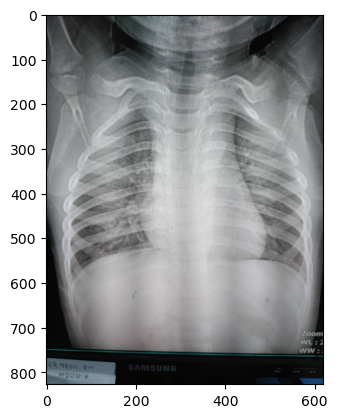

In [26]:
import cv2
tt=cv2.imread('ii2.jpg')
plt.imshow(tt)

In [27]:
TT=v2.ToImage()(tt)
TT=v2.Resize(size=(256,256),interpolation=v2.InterpolationMode.BILINEAR)(TT)
TT=TT.unsqueeze(dim=0)

In [28]:
TT.shape

torch.Size([1, 3, 256, 256])

In [34]:
import cv2
TT=cv2.imread('ii2.jpg')
#plt.imshow(TT)
TT=v2.ToImage()(tt)
#print(type(TT))
TT=v2.Resize(size=(256,256),interpolation=v2.InterpolationMode.BILINEAR)(TT)
TT=TT.unsqueeze(dim=0)
TT=TT.float()
get_disease(torch.argmax(model(TT)))

'코로나'

In [36]:
import cv2
tt=cv2.imread('ii2.jpg')
#print(type(tt[0][0][0]))
TT=v2.ToImage()(tt)
print(TT)
TT=v2.Resize(size=(256,256),interpolation=v2.InterpolationMode.BILINEAR)(TT)
TT=TT.unsqueeze(dim=0)
TT=v2.ToDtype(torch.float32,scale=False)(TT)
get_disease(torch.argmax(model(TT)))

Image([[[ 56,  19,  47,  ...,  41,  39,  35],
        [ 62,  22,  47,  ...,  40,  36,  32],
        [ 68,  23,  45,  ...,  43,  38,  35],
        ...,
        [ 79,  81,  80,  ...,  19,  19,  19],
        [ 81,  82,  80,  ...,  22,  24,  25],
        [ 84,  84,  81,  ...,  21,  26,  28]],

       [[ 61,  24,  52,  ...,  46,  44,  40],
        [ 67,  27,  52,  ...,  45,  41,  37],
        [ 73,  28,  50,  ...,  48,  42,  39],
        ...,
        [ 95,  97,  96,  ...,  61,  61,  61],
        [ 97,  98,  96,  ...,  64,  66,  67],
        [100, 100,  97,  ...,  66,  68,  70]],

       [[ 64,  27,  55,  ...,  47,  45,  41],
        [ 70,  30,  55,  ...,  46,  42,  38],
        [ 76,  31,  53,  ...,  49,  43,  40],
        ...,
        [107, 109, 108,  ..., 106, 106, 106],
        [109, 110, 108,  ..., 109, 111, 112],
        [112, 112, 109,  ..., 110, 113, 115]]], dtype=torch.uint8, )


'코로나'

In [31]:
pd.Series(testDS.targets).value_counts()

2    390
1    234
0    106
3     41
Name: count, dtype: int64